1. Realiza una exploración de los datos, considerando sus tipos y los descriptivos
correspondientes.

In [42]:
import pandas as pd

# Cargar el conjunto de datos
data = pd.read_csv('baby.csv')

# Mostrar las primeras filas del DataFrame para entender la estructura de los datos
data.head()


,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
0,1,120,284,27,62,100,False
1,2,113,282,33,64,135,False
2,3,128,279,28,64,115,True
3,4,108,282,23,67,125,True
4,5,136,286,25,62,93,False


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Unnamed: 0                 1174 non-null   int64
 1   Birth.Weight               1174 non-null   int64
 2   Gestational.Days           1174 non-null   int64
 3   Maternal.Age               1174 non-null   int64
 4   Maternal.Height            1174 non-null   int64
 5   Maternal.Pregnancy.Weight  1174 non-null   int64
 6   Maternal.Smoker            1174 non-null   bool 
dtypes: bool(1), int64(6)
memory usage: 56.3 KB


In [47]:
# Obtener información sobre los tipos de datos y estadísticas descriptivas
data.dropna().describe().round(3)


,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight
count,1174.000,1174.000,1174.000,1174.000,1174.000,1174.000
mean,587.500,119.463,279.101,27.228,64.049,128.479
std,339.049,18.329,16.010,5.818,2.526,20.734
min,1.000,55.000,148.000,15.000,53.000,87.000
25%,294.250,108.000,272.000,23.000,62.000,114.250
50%,587.500,120.000,280.000,26.000,64.000,125.000
75%,880.750,131.000,288.000,31.000,66.000,139.000
max,1174.000,176.000,353.000,45.000,72.000,250.000


In [53]:
data2= data.drop(columns=['Unnamed: 0']).dropna().count()
data2

Birth.Weight                 1174
Gestational.Days             1174
Maternal.Age                 1174
Maternal.Height              1174
Maternal.Pregnancy.Weight    1174
Maternal.Smoker              1174
dtype: int64

In [52]:
data3= data.drop(columns=['Unnamed: 0']).dropna().value_counts()
data3

Birth.Weight  Gestational.Days  Maternal.Age  Maternal.Height  Maternal.Pregnancy.Weight  Maternal.Smoker
55            204               35            65               140                        False              1
127           275               26            62               125                        False              1
              291               24            66               135                        True               1
              290               35            66               165                        False              1
                                                               122                        False              1
                                                                                                            ..
113           282               30            64               118                        True               1
              281               24            65               120                        False              1
      

In [54]:
data.value_counts('Maternal.Smoker')

Maternal.Smoker
False    715
True     459
Name: count, dtype: int64

In [55]:
data.shape

(1174, 7)

2. Considera los pesos de los bebés. ¿Se puede decir que siguen una distribución
normal? Justifica tu respuesta creando los gráficos y modelos necesarios.

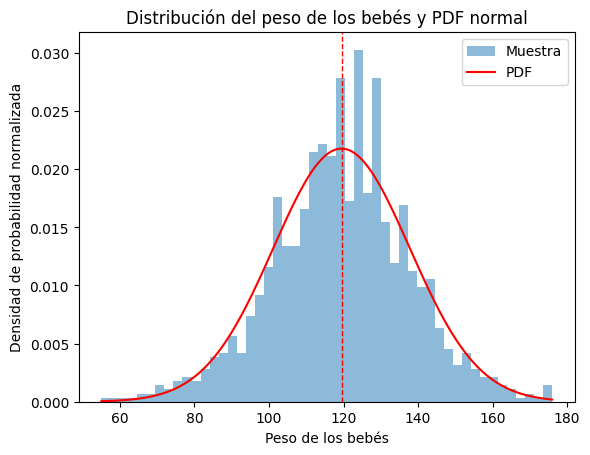

In [65]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

# Calculamos la media y la desviación estándar del peso de los bebés
mu = data['Birth.Weight'].mean()
sigma = data['Birth.Weight'].std()

# Calculamos el rango para el eje x del gráfico
minimo = data['Birth.Weight'].min()
maximo = data['Birth.Weight'].max()
x = np.linspace(minimo, maximo, 1000)

# Calculamos la función de densidad de probabilidad normal (PDF)
pdf = norm.pdf(x, loc=mu, scale=sigma)

# Construimos el histograma de los pesos de los bebés
plt.hist(data['Birth.Weight'], bins=50, density=True, alpha=0.5, label='Muestra')  # alpha=0.5 da un 50% de transparencia

# Graficamos la distribución normal
plt.plot(x, pdf, color='red', label='PDF')
plt.axvline(mu,
            color='red',
            linestyle='--', lw=1)

# Configuramos etiquetas y título
plt.xlabel('Peso de los bebés')
plt.ylabel('Densidad de probabilidad normalizada')
plt.title('Distribución del peso de los bebés y PDF normal')
plt.legend()
plt.show()


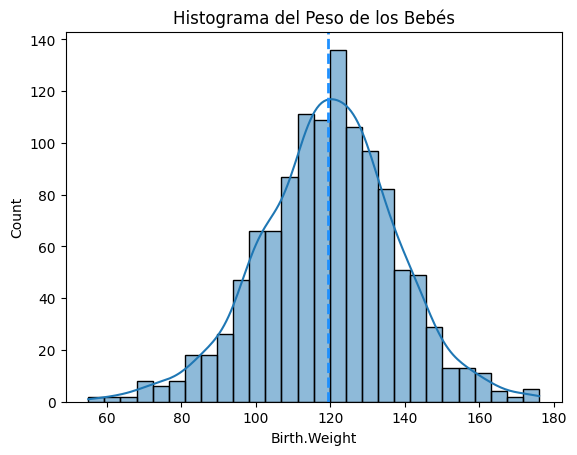

In [69]:
import seaborn as sns
from scipy import stats
# Gráfico de histograma
sns.histplot(data['Birth.Weight'], kde=True)
plt.axvline(mu, color='dodgerblue', linestyle='--', lw=2)
plt.title('Histograma del Peso de los Bebés')
plt.show()


Los pesos de los bebés en el conjunto de datos tienen una distribución cercana a la normal, ya que graficamente se puede observar que la forma del histograma se asemeja a la curva de densidad de probabilidad normal, (forma de campana de Gauss) alrededor de la media.

3. Considerando lo anterior, verifica el modelo de distribución normal de los pesos para
5 valores diferentes. Compara con los datos reales

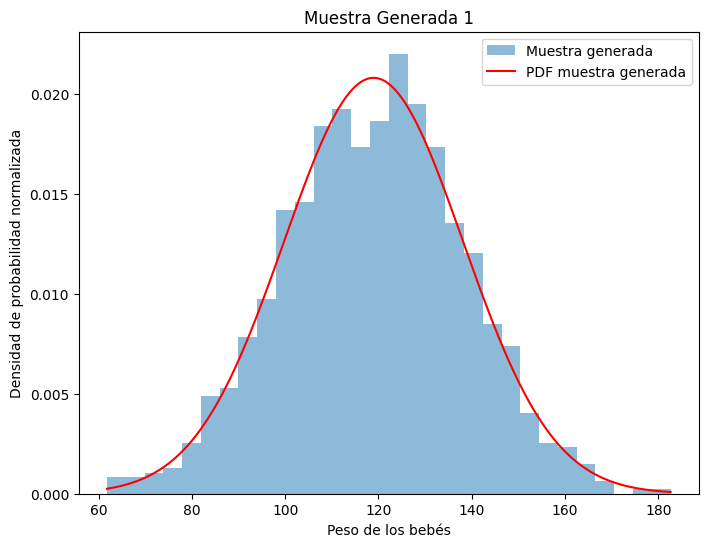

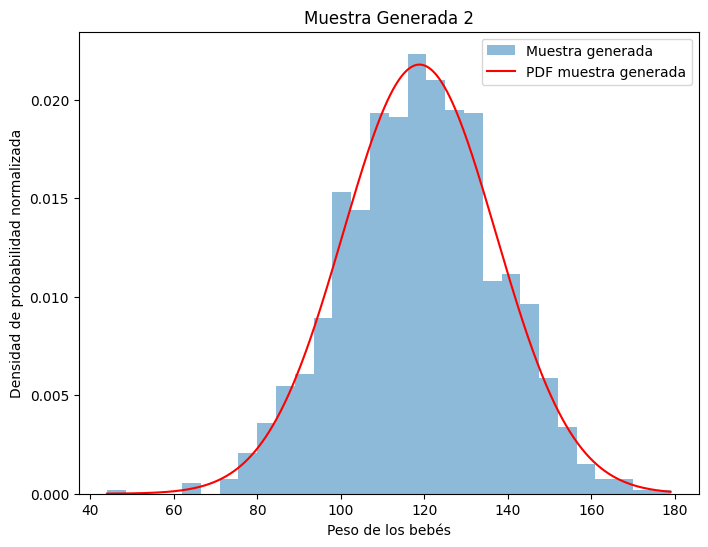

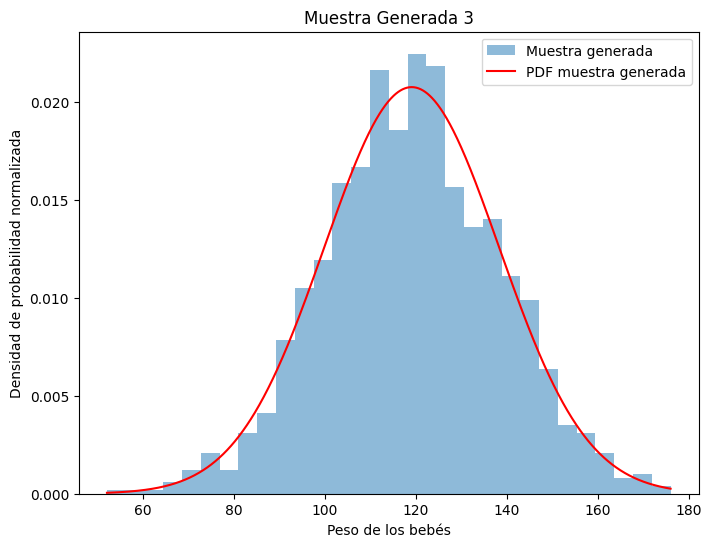

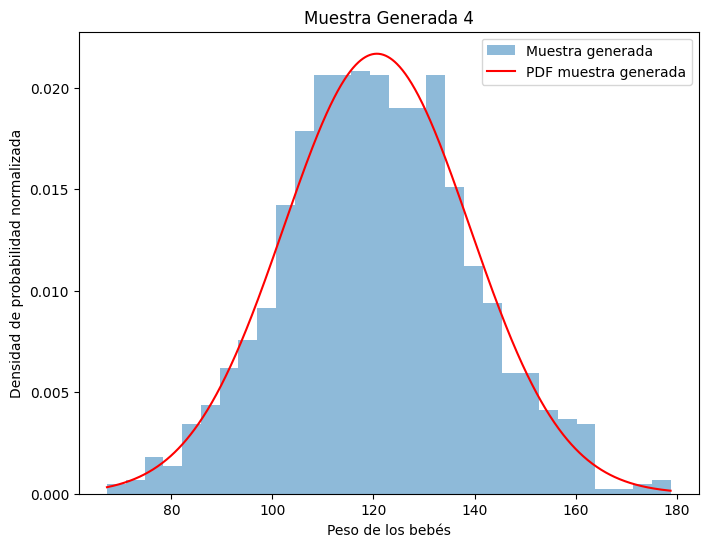

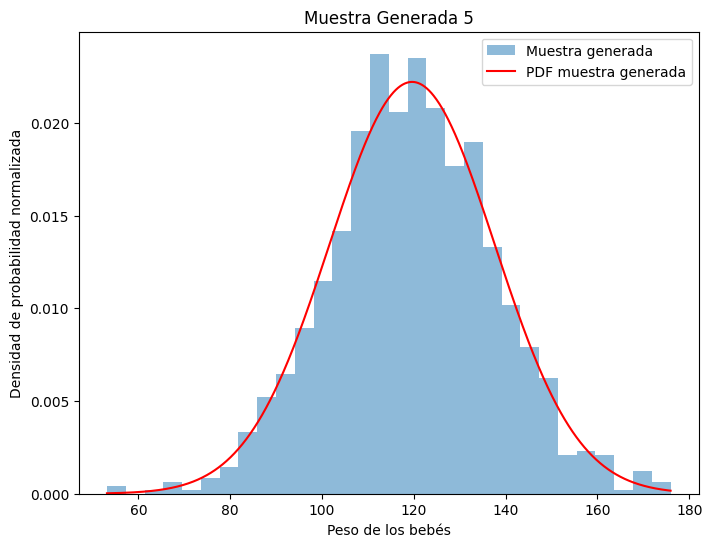

In [72]:


# Calculamos la media y la desviación estándar del peso de los bebés en los datos reales
mu_real = data['Birth.Weight'].mean()
sigma_real = data['Birth.Weight'].std()

# Definimos la cantidad de muestras que queremos generar y comparar
num_muestras = 5

# Generamos y mostramos histogramas y curvas de distribución normal para 5 muestras diferentes
for i in range(num_muestras):
    # Generamos una muestra aleatoria del mismo tamaño que los datos reales
    muestra = np.random.normal(mu_real, sigma_real, size=len(data))
    
    # Calculamos la media y la desviación estándar de la muestra generada
    mu_muestra = muestra.mean()
    sigma_muestra = muestra.std()
    
    # Calculamos el rango para el eje x del gráfico
    minimo = muestra.min()
    maximo = muestra.max()
    x = np.linspace(minimo, maximo, 1000)
    
    # Calculamos la función de densidad de probabilidad normal (PDF) para la muestra generada
    pdf_muestra = norm.pdf(x, loc=mu_muestra, scale=sigma_muestra)
    
    # Construimos el histograma y la curva de densidad de probabilidad normal para la muestra generada
    plt.figure(figsize=(8, 6))
    plt.hist(muestra, bins=30, density=True, alpha=0.5, label='Muestra generada')  # alpha=0.5 da un 50% de transparencia
    plt.plot(x, pdf_muestra, color='red', label='PDF muestra generada')
    
    # Configuramos etiquetas y título
    plt.xlabel('Peso de los bebés')
    plt.ylabel('Densidad de probabilidad normalizada')
    plt.title(f'Muestra Generada {i+1}')
    plt.legend()
    plt.show()


 1. Compara los pesos de los bebés de madres fumadoras y no fumadoras. ¿Qué
 diferencias existen? Explica y construye los modelos correspondientes.

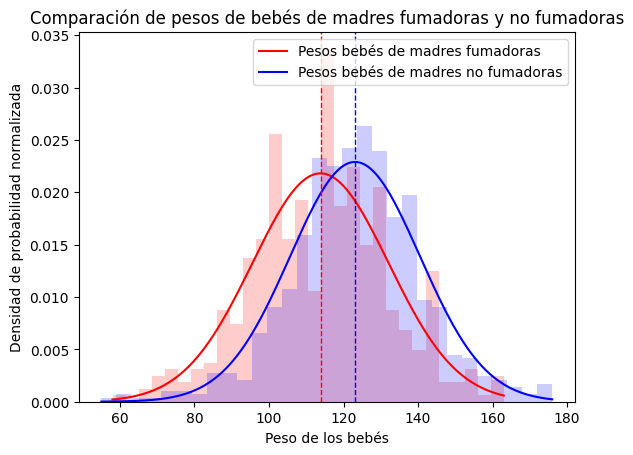

In [79]:

# Función para obtener el eje x y la densidad de probabilidad de una distribución normal
def get_psd(x):
    mu = x.mean()
    sigma = x.std()
    minimo = x.min()
    maximo = x.max()
    x_vals = np.linspace(minimo, maximo, 1000)
    pdf = norm.pdf(x_vals, loc=mu, scale=sigma)
    return x_vals, pdf

# Se generan las listas bbmf y bbmnf con los pesos de los bebés de madres fumadoras y no fumadoras
bbmf = data[data['Maternal.Smoker'] == True]['Birth.Weight']
bbmnf = data[data['Maternal.Smoker'] == False]['Birth.Weight']

# Se obtienen las curvas de densidad de probabilidad para los pesos de bebés de madres fumadoras y no fumadoras
x, pdf = get_psd(bbmf)
plt.plot(x, pdf, color='red', label='Pesos bebés de madres fumadoras')

x, pdf = get_psd(bbmnf)
plt.plot(x, pdf, color='blue', label='Pesos bebés de madres no fumadoras')

# Histogramas para los pesos de bebés de madres fumadoras y no fumadoras
plt.hist(bbmf, bins=30, density=True, alpha=0.2, color='red')
plt.axvline(bbmf.mean(), color='red', linestyle='--', lw=1)

plt.hist(bbmnf, bins=30, density=True, alpha=0.2, color='blue')
plt.axvline(bbmnf.mean(), color='blue', linestyle='--', lw=1)

# Configuraciones del gráfico
plt.xlabel('Peso de los bebés')
plt.ylabel('Densidad de probabilidad normalizada')
plt.title('Comparación de pesos de bebés de madres fumadoras y no fumadoras')
plt.legend()
plt.show()



Forma de las Distribuciones: Ambas distribuciones (bebés de madres fumadoras y no fumadoras) parecen seguir aproximadamente una forma normal. Esto se deduce tanto de la forma de las curvas de densidad de probabilidad (las líneas suaves) como del hecho de que los histogramas de los datos se asemejan a la forma de una campana.

Diferencia de Medias: La línea punteada vertical indica la media de cada grupo. Se puede observar que la media del peso de los bebés de madres no fumadoras (línea punteada azul) parece estar ligeramente a la derecha (mayor) que la media del peso de los bebés de madres fumadoras (línea punteada roja). Esto sugiere que, en promedio, los bebés de madres no fumadoras tienden a pesar un poco más que los bebés de madres fumadoras.

Variabilidad: Aunque ambas distribuciones son aproximadamente simétricas y en forma de campana, la distribución de los bebés de madres fumadoras parece ser un poco más ancha, lo que indica una mayor variabilidad en los pesos de los bebés nacidos de madres fumadoras en comparación con los bebés de madres no fumadoras.

Traslapo de las Distribuciones: Las distribuciones de ambos grupos se superponen significativamente, lo que indica que hay una gran cantidad de casos donde los pesos de los bebés de madres fumadoras y no fumadoras son muy similares.

En resumen, aunque hay diferencias ligeras en las medias y variabilidades, hay una considerable superposición entre los dos grupos. Esto sugiere que si bien puede haber una tendencia general hacia pesos ligeramente más bajos para los bebés de madres fumadoras, esta diferencia no es tan pronunciada y hay una gran variabilidad en ambos grupos. Estas observaciones deberían interpretarse considerando también el contexto clínico y cualquier otra información relevante disponible sobre los datos.

In [80]:
#estadisticas madres fumadoras
bbmf.describe()


count    459.000000
mean     113.819172
std       18.295010
min       58.000000
25%      101.000000
50%      115.000000
75%      126.000000
max      163.000000
Name: Birth.Weight, dtype: float64

In [81]:
#estadisticas madres no fumadoras
bbmnf.describe()

count    715.000000
mean     123.085315
std       17.423695
min       55.000000
25%      113.000000
50%      123.000000
75%      134.000000
max      176.000000
Name: Birth.Weight, dtype: float64

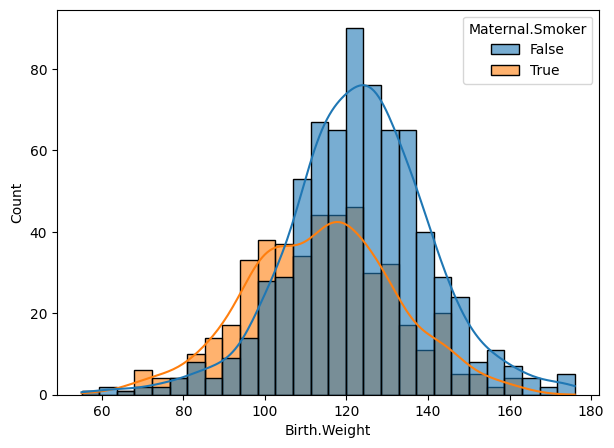

In [84]:
plt.figure(figsize = (7, 5))
sns.histplot(data = data, x = 'Birth.Weight', hue = 'Maternal.Smoker', kde = True, alpha = 0.6)
plt.show()

5. Construye un modelo de distribución binomial que modele el experimento
correspondiente a escoger 5 madres al azar y observar cuántas fuman. Utilizando
este modelo y los datos reales, genera en cada caso 1000 muestras de tamaño 8 con
sus respectivas medias muestrales. A partir de ello:
● compáralas gráficamente
● verifica el teorema del límite central, considerando las muestras de datos reales y el
modelo normal derivado del modelo binomial.

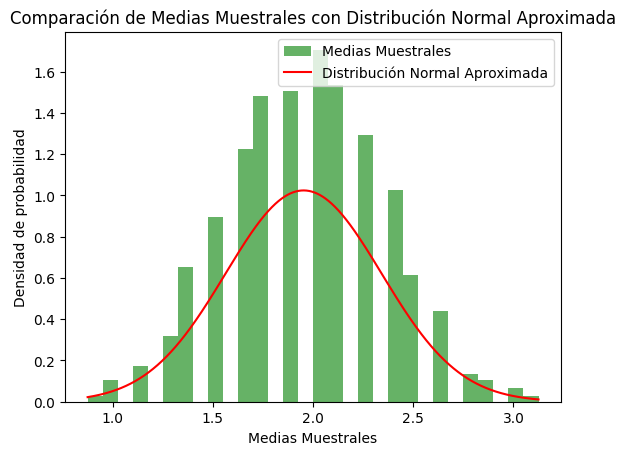

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm

# Parámetros del experimento
num_mothers = 5  # Número de madres seleccionadas al azar
sample_size = 8   # Tamaño de cada muestra

# Probabilidad de que una madre sea fumadora
p_smoker = data['Maternal.Smoker'].mean()

# Construimos el modelo binomial
binomial_dist = binom(num_mothers, p_smoker)

# Generamos 1000 muestras de tamaño 8 y calculamos las medias muestrales
sample_means = [binomial_dist.rvs(sample_size).mean() for _ in range(1000)]

# Calculamos la media y la desviación estándar de las medias muestrales
sample_means_mean = np.mean(sample_means)
sample_means_std = np.std(sample_means)

# Calculamos la distribución normal aproximada usando el teorema del límite central
normal_approx = norm(sample_means_mean, sample_means_std)

# Generamos el gráfico comparativo
plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='g', label='Medias Muestrales')
x = np.linspace(min(sample_means), max(sample_means), 1000)
plt.plot(x, normal_approx.pdf(x), color='red', label='Distribución Normal Aproximada')
plt.xlabel('Medias Muestrales')
plt.ylabel('Densidad de probabilidad')
plt.title('Comparación de Medias Muestrales con Distribución Normal Aproximada')
plt.legend()
plt.show()


La media del ensayo de Bernoulli es de: 0.39
La varianza del ensayo de Bernoulli es de: 0.24
La probabilidad de ocurrencia asumiendo una desviación estándar se encuentra entre: 0.15 0.63
Con 5 madres y una probabilidad de 0.3909710391822828 esperamos que en promedio 1 madres sean fumadoras.


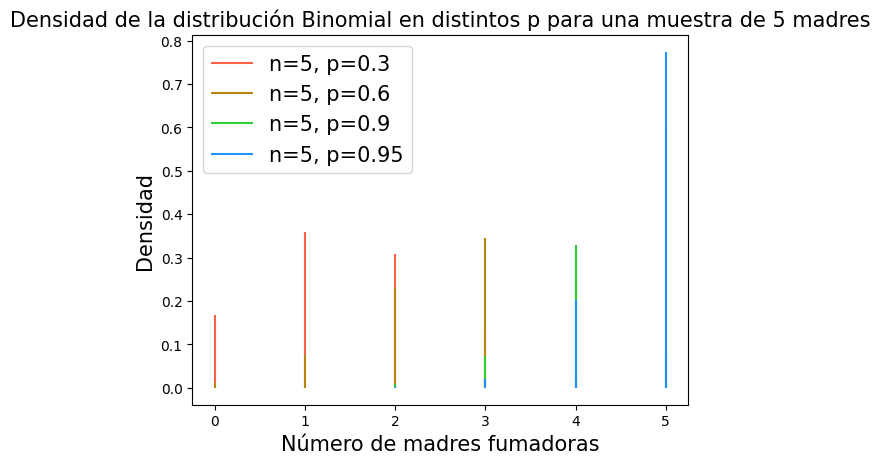

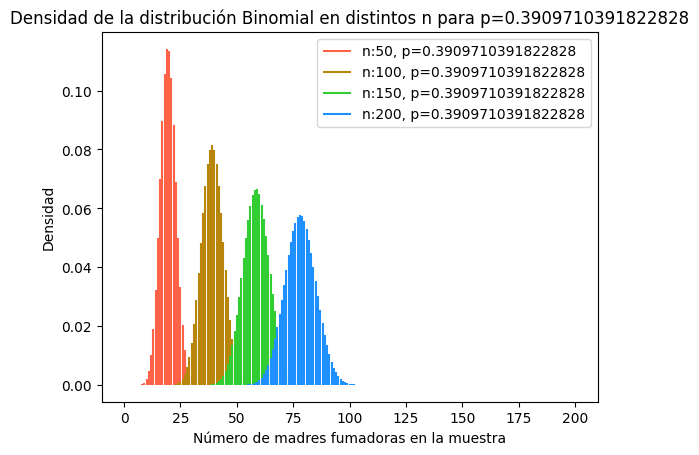

In [89]:
# Probabilidad de que una madre sea fumadora
p_smoker = data['Maternal.Smoker'].mean()

# Distribución Bernoulli para una madre fumadora
bernoulli_dist = stats.bernoulli(p_smoker)

# Media y varianza de la distribución Bernoulli
mu_bernoulli, sigma_bernoulli = bernoulli_dist.stats()

print("La media del ensayo de Bernoulli es de:", mu_bernoulli.round(2))
print("La varianza del ensayo de Bernoulli es de:", sigma_bernoulli.round(2))
print("La probabilidad de ocurrencia asumiendo una desviación estándar se encuentra entre:",
      round(mu_bernoulli - sigma_bernoulli, 2), round(mu_bernoulli + sigma_bernoulli, 2))

# Número esperado de madres fumadoras en una muestra de 5 madres
expected_smokers = int(5 * p_smoker)

# Distribución Binomial para el número de madres fumadoras en una muestra de 5 madres
binomial_dist = stats.binom(5, p_smoker)

# Media y varianza de la distribución Binomial
mu_binomial, sigma_binomial = binomial_dist.stats()

print("Con 5 madres y una probabilidad de", p_smoker, "esperamos que en promedio", expected_smokers, "madres sean fumadoras.")

# generamos una lista con cuatro colores
colors = ["tomato", "darkgoldenrod", "limegreen", "dodgerblue"]

# Densidad de la distribución Binomial en distintos p para una muestra de 5 madres
for i, prob in enumerate([0.3, 0.6, 0.9, 0.95]):
    x_axis = np.arange(6)
    plt.vlines(x_axis, 0, stats.binom(5, prob).pmf(x_axis),
               colors=colors[i], label="n=5, p={}".format(prob))
plt.legend(loc=2, fontsize=15)
plt.title("Densidad de la distribución Binomial en distintos p para una muestra de 5 madres", size=15)
plt.xlabel('Número de madres fumadoras', size=15)
plt.ylabel('Densidad', size=15)
plt.show()

# Densidad de la distribución Binomial en distintos n para una probabilidad de 0.65
for i, n_size in enumerate([50, 100, 150, 200]):
    x_axis = np.arange(n_size + 1)
    plt.vlines(x_axis, 0, stats.binom(n_size, p_smoker).pmf(x_axis),
               colors=colors[i], label=r'n:{0}, p={1}'.format(n_size, p_smoker))
plt.legend()
plt.title("Densidad de la distribución Binomial en distintos n para p={}".format(p_smoker))
plt.xlabel("Número de madres fumadoras en la muestra")
plt.ylabel('Densidad')
plt.show()
